# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')

from scipy.stats import norm
from scipy import stats

In [2]:
medical.shape

(1338, 8)

In [3]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__ The distribution of the data is greatly right skewed, but most of the data points seem to be around 20,000 or less. The mean is 13270.42 and the standard deviation is 12105.48. The mean of the data looks like it should be around 10,000 or less, but since the distribution is hugely right skewed, the mean is dragged higher. The standard deviation is very large due to the right skew, but since the distribution has different spreads to the left and right of the mean, the calculated standard deviation is not useful.
Using the median as a summary statistic instead of the mean would be more appropriate, since the median is not affected by outliers, while the mean is affected by outliers.

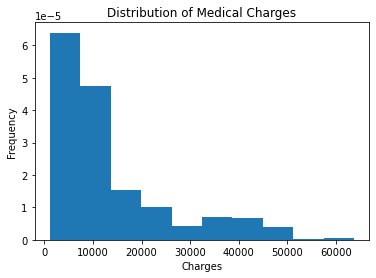

In [4]:
_ = plt.hist(medical['charges'], bins=10, density=True)
_ = plt.xlabel('Charges')
_ = plt.ylabel('Frequency')
_ = plt.title('Distribution of Medical Charges')
plt.show()

In [5]:
mean_charges = np.mean(medical['charges'])
std_charges = np.std(medical['charges'])
mean_charges, std_charges

(13270.422265141257, 12105.484975561605)

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ We should use the Central Limit Theorem, because even if the distribution of the data is not normal, the sampling distribution of the mean of charges, with a large sample size, will be approximately normally distributed. Since we are applying the Central Limit Theorem and we do not know the actual population parameters, especially the population standard deviation, the most appropriate frequentist test that we have talked about so far would be the two-tailed t-test.

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__ A one sided confidence interval would have been more appropriate for the right-skewed distribution of the single sample we collected and plotted above. However, since we are applying the Central Limit Theorem and forcing the sampling distribution to be bell-shaped, a two-sided confidence interval would be more appropriate for approximating the sampling mean.

The administrator **should or shouldn't** be concerned about the average charge falling below 12,000. As we can say with 95% confidence, the mean of the charges lies within the interval (**insert CI interval**). Thus, 

In [6]:
def n_sampler(n):
    return np.random.choice(medical['charges'], n)

seed(47)
charges_clt = [np.mean(n_sampler(100)) for i in range(0,1000)]

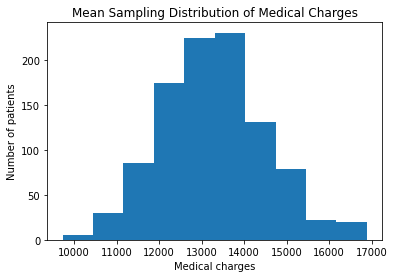

In [7]:
_ = plt.hist(charges_clt, bins=10)
_ = plt.xlabel('Medical charges')
_ = plt.ylabel('Number of patients')
_ = plt.title('Mean Sampling Distribution of Medical Charges')

In [8]:
# calculate the critical value
df = 100 - 1
alpha = 0.05
a = alpha / 2 
se = np.std(charges_clt) / np.sqrt(100)
crit_val = (norm.ppf(0.975, loc=np.mean(charges_clt), scale=np.std(charges_clt)) - np.mean(charges_clt)) / se
crit_val
# will use a two-tailed t-test. According to t-distribution table, critical value should be 1.9842.

19.599639845400546

In [9]:
# calculate the 95% CI
upper_t = norm.ppf(0.975, loc=np.mean(charges_clt), scale=np.std(charges_clt))
lower_t = norm.ppf(0.025, loc=np.mean(charges_clt), scale=np.std(charges_clt))
lower_t, upper_t

(10881.254934285746, 15686.296840687512)

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__ The null hypothesis is that people with and without insurance get charged the same amount. The alternative hypothesis is that people with insurance get charged less than what people without insurance get charged.

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [10]:
no_insurance = medical[medical['insuranceclaim']== 0]
with_insurance = medical[medical['insuranceclaim']== 1]

n0 = np.sum(medical['insuranceclaim'] == 0) # 555
n1 = np.sum(medical['insuranceclaim'] == 1) # 783
s0 = np.std(no_insurance['charges'])
s1 = np.std(with_insurance['charges'])

# calculate pooled standard deviation manually
sp = np.sqrt(((n0 - 1)*(s0**2) + (n1 - 1)*(s1**2)) / (n0 + n1 - 2))

x0 = np.mean(no_insurance['charges'])
x1 = np.mean(with_insurance['charges'])

# calculate t-statistic manually

t = (x0 - x1)/(sp*np.sqrt((1/n0) + (1/n1)))
t

-11.901306943555385

In [11]:
# calculate p-value manually

p = norm.cdf(-t, loc=(x0+x1), scale=sp) - norm.cdf(t, loc=(x0+x1), scale=sp)
p

7.44986270375201e-05

In [12]:
stats.ttest_ind(no_insurance['charges'], with_insurance['charges'], axis=0, equal_var=True, nan_policy='omit')

Ttest_indResult(statistic=-11.893299030876712, pvalue=4.461230231620717e-31)

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ No, there isn't an equivalent function in scipy.stats. This makes sense, since a two-sample z-test is not commonly used in practice, because if we use a z-test, then it means that we know the variable's standard deviation in the population. Two-sample t-tests are more common.

However, statsmodels has the statsmodels.stats.weightstats.ztest function, which can perform a z-test for two independent samples.

(referenced: https://www.cliffsnotes.com/study-guides/statistics/univariate-inferential-tests/two-sample-z-test-for-comparing-two-means)

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test